# Climatological Lagrangian Coherent Structure

Objective: Having climatological fields calculate the cLCSs for a region. 
Climatological LCS based on the code developed by Rodrigo Duran for [Matlab](https://bitbucket.org/rodu/clcss/src/master/)

Dec - 2023 Mireya M. Montano mireya.mmor@gmail.com

## Extracting Data

As part of the Moana Project the data for the Bay of Plenty (region of study) is available through [THREDDS](http://thredds.moanaproject.org:6443/thredds/catalog/moana/catalog.html) server. Therefore, we can just call the desired file providing the link.

In [1]:
import os

THREDDS_SERVER = "http://thredds.moanaproject.org:6443/thredds/dodsC/moana/"
BOP_CLIMA_PATH = f"BoP_1km/climatology_sigma/BoP_climatology_"

PATH = os.path.join(THREDDS_SERVER, BOP_CLIMA_PATH)

### Parameters needed
#### File/environment related parameters
In this section we define the file-environment related parameters. Such as:
- month: month to analyse
- climatology_file: path to the climatology file with the velocity fields
- dirr: Working directory where the generated files are going to be saved. In this case we are using the current directory as an example
- vars_dict: Dictionary containing the names associated to the lon, lat and mask variables within the file. ROMS example:
  - {"mask": "mask_rho", "lon": "lon_rho", "lat": "lat_rho"}

In [2]:
month = 1
m = "%02d" % int(month)
climatology_file = f"{PATH}{m}.nc"
dirr = os.getcwd()

vars_dict = {"mask": "mask_rho", "lon": "lon_rho", "lat": "lat_rho"}

#### Particle release and OpenDrift configuration parameters

In this portion we define the particle release and Opendrfit configuration related parameters. 

Particle release:
- T (int): Timescale to use, use negative timescale if a backward in time simulation is needed
- dt (int): Particle release time step in hours. Default 6 
- frequency_of_deployments (int): how often are particle releases made in days. Default 1
- time_step_output (int): If the output of the trajectories is required this will define the output time step in days. Default 1
- z (int): Depth of releases. The cLCS are calculated on the surface therefore the value is 0 however this analyses can be potentially done at different depths. 

OpenDrift configuration:
- opendrift_reader (str): Reader for the files, see OpenDrift for more information. In this example we use "reader_ROMS_native_MOANA"
- opendrift_model (str): OpenDrift module to use. In this example we use "OceanDrift"
- log_level (int): Logging information for Opendrfit. 50 - No information, 20 For a certain amount, 0 for all the debugging
- max_speed (int): maximum speed particles are allowed to reach in m/s. Default 5
- horizontal_diffusivity (int): Particle release horizontal diffusivity. Default: 0.1
- advection_scheme (str): advection scheme of the particle release. Default: "runge-kutta4"

In [3]:
T = -7
dt = 6
time_step_output = 86400
frequency_of_deployments = 1
z = 0

# OpenDrift configuration parameters
opendrift_reader = "reader_ROMS_native_MOANA"
opendrift_model = "OceanDrift"
log_level = 40  # 50 For no logging information, 20 For a certain amount, 0 for all the debugging
max_speed = 5
horizontal_diffusivity = 0.1
advection_scheme = "runge-kutta4"

#### OpenDrift releases and calculation of the Cauchy-Green Tensors.

This class returns a file containing the accumulated values associated with the calculation of the Cauchy-Green Tensors for each run of the chosen month. It can also return a file containing the calculated particle trajectories and the daily Cauchy-Green Tensor estimates,     save_trajectories=True and save_daily_CG=True respectively. 

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#69337A; border-left: solid #805AD5 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
This is a 315x400 grid, therefore each release takes about a minute (~115.5K particles per release, 22 to 24 releases per month). Therefore the calculation for each month varies between 25 to 30 minutes regardles of more files being saved (saving the trajectories and daily Cauchy-Green Tensors). However once it is run and the TOT-%m.p pickle file is saved there is no need to re-run the particle simulation.  
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>


In [4]:
from cLCS.mean_C import mean_CG

CG = mean_CG(
    dirr,
    climatology_file,
    month,
    T,
    dt,
    frequency_of_deployments,
    time_step_output,
    z,
    opendrift_reader,
    opendrift_model,
    log_level,
    vars_dict,
    max_speed,
    horizontal_diffusivity,
    advection_scheme,
    save_trajectories=False,
    save_daily_CG=False,
)

CG.run()

INFO:root:--- Creating output directory
/Users/mireyamontano/miniforge3/envs/cLCS/lib/python3.11/site-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
INFO:root:--- 2020-01-08 12:00:00 Release


2020-01-08 12:00:00
2020-01-09 12:00:00
2020-01-10 12:00:00
2020-01-11 12:00:00
2020-01-12 12:00:00
2020-01-13 12:00:00
2020-01-14 12:00:00
2020-01-15 12:00:00
2020-01-16 12:00:00
2020-01-17 12:00:00
2020-01-18 12:00:00
2020-01-19 12:00:00
2020-01-20 12:00:00
2020-01-21 12:00:00
2020-01-22 12:00:00
2020-01-23 12:00:00
2020-01-24 12:00:00
2020-01-25 12:00:00
2020-01-26 12:00:00
2020-01-27 12:00:00
2020-01-28 12:00:00
2020-01-29 12:00:00
2020-01-30 12:00:00
2020-01-31 12:00:00


#### Squeezelines computation
Using the Cauchy-green calculations this portion of the code computes the squeezelines which are a function of (X,Y)

This code integrates line field from 0 to arclength.

Suggestion: arclength = 150

The output of this class is a file cLCS_%m.p containing the squeezelines (X,Y)

In [5]:
from cLCS.make_cLCS import compute_cLCS_squeezelines

squeezelines = compute_cLCS_squeezelines(f"{dirr}/", month, arclength=150)

squeezelines.run()

In [6]:
import numpy as np

PX, PY = np.load(f"{dirr}/{m}/cLCS_01.p", "rb", allow_pickle=True)

PX.shape

(590, 150)

#### Visualisation of cLCSs

This section plots the coloured lines of cLCSs. 
<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#F28C28; border-left: solid #C04000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
It is a slow code as it segments each portion of the line to identify the intensity of the LCS in that segment. This is a process that is applied to each line as well. This example has 590 squeezelines with 150 segments each line.  
</p>
<p style='margin-left:1em;'>
This can probably be improved.
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>


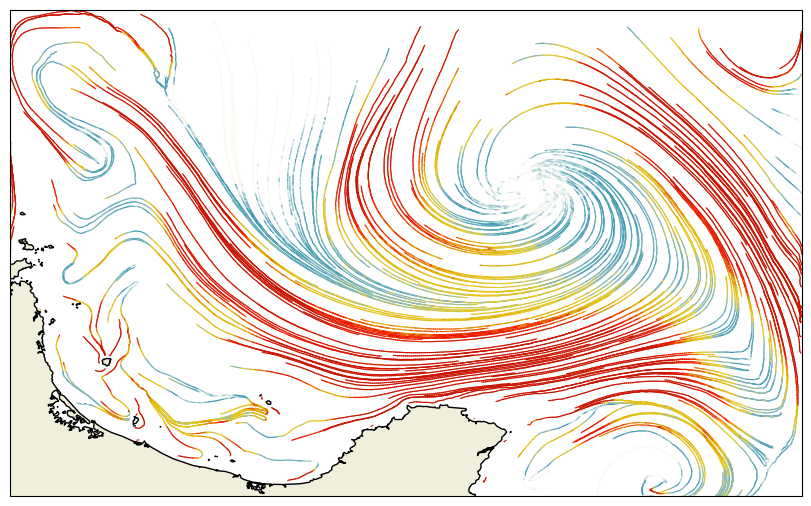

In [7]:
from cLCS.plotting_cLCS import *

fig = cLCSrho_cartopy(
    dirr,
    month,
    colourmap="Zissou",
    fig=None,
    ax=None,
    projection=ccrs.PlateCarree(central_longitude=180),
    line_spacing=2,
)

And only a quick visualisation is needed we can plot as blacklines.

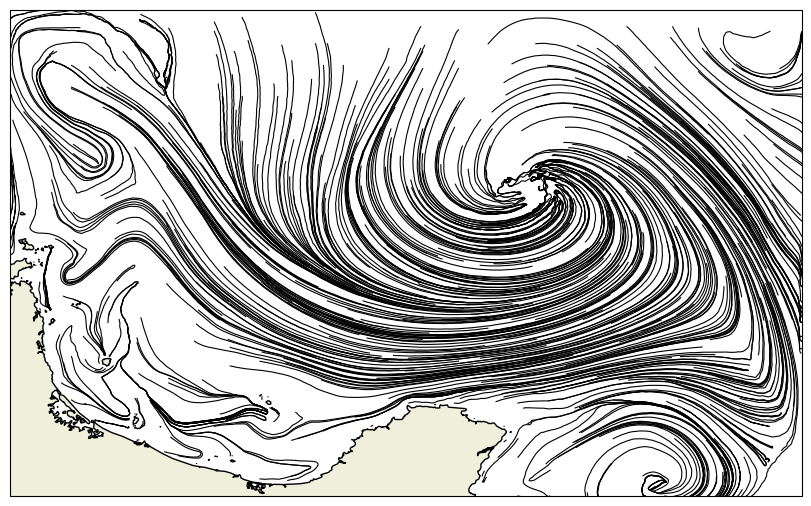

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cLCS.utils import *
import pickle
from cLCS.plotting_cLCS import *

fig = plt.figure(figsize=(8, 6), constrained_layout=True)
projection = ccrs.PlateCarree(central_longitude=180)
ax = fig.add_subplot(projection=projection)
f = cfeature.GSHHSFeature(scale="high", levels=[1])
ax.add_geometries(
    f.geometries(),
    ccrs.PlateCarree(),
    facecolor=cfeature.COLORS["land"],
    edgecolor="black",
)
TOT_CG_path = f"{dirr}/{m}/TOT-{m}.p"
lon, lat, _, _, _, _, _, _, _, _, _, _ = pickle.load(open(TOT_CG_path, "rb"))
lonmin = lon.min()
latmin = lat.min()
lonmax = lon.max()
latmax = lat.max()
corners = [lonmin, lonmax, latmin, latmax]
ax.set_extent(corners, crs=ccrs.PlateCarree())
for x, y in zip(PX, PY):
    [xS, yS] = xy2sph(x * 1e3, lonmin, y * 1e3, latmin)
    plot_blacklines(xS, yS, transform=ccrs.PlateCarree())

### Additional notes
<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#009E60; border-left: solid #097969 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
It is important to remark that each study region and application of cLCS is different and question-dependant so tests with different parameters are recommended to assess the best configuration. For this study we had a 27-year hindcast of a coastal region and we were interested in looking into the persistent patterns on the coastal region. 
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>
